In [955]:
import torch
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from collections import Counter
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [957]:
l2s = range(10)
borders = range(10)
centers = [0, 1, 2, 4, 5, 6, 7, 8, 9]
l2_files = [
    torch.load(f'./trained_models/distances_l2_border_stl10_perturb_0.{i}.pt')
    for i in l2s
]
border_files = [
    torch.load(f'./trained_models/distances_border_stl10_perturb_0.{i}.pt')
    for i in borders
]
center_files = [
    torch.load(f'./trained_models/distances_center_stl10_perturb_0.{i}.pt')
    for i in centers
]

In [958]:
deltas = [0.1, 0.05, 0.005]
l2_delta_mems = {delta : [torch.sum(l2_files[i] / 30 < delta) for i in range(len(l2_files))] for delta in deltas}
border_delta_mems = {delta : [torch.sum(border_files[i] < delta) for i in range(len(border_files))] for delta in deltas}
center_delta_mems = {delta : [torch.sum(center_files[i] < delta) for i in range(len(center_files))] for delta in deltas}

In [959]:
for delta in deltas:
    print(f"Delta: {delta}; Border: {border_delta_mems[delta][0]}; Center: {center_delta_mems[delta][0]}")
    print(f"L2: {l2_delta_mems[delta][0]}")

Delta: 0.1; Border: 1879; Center: 1927
L2: 10000
Delta: 0.05; Border: 977; Center: 1011
L2: 1095
Delta: 0.005; Border: 81; Center: 107
L2: 0


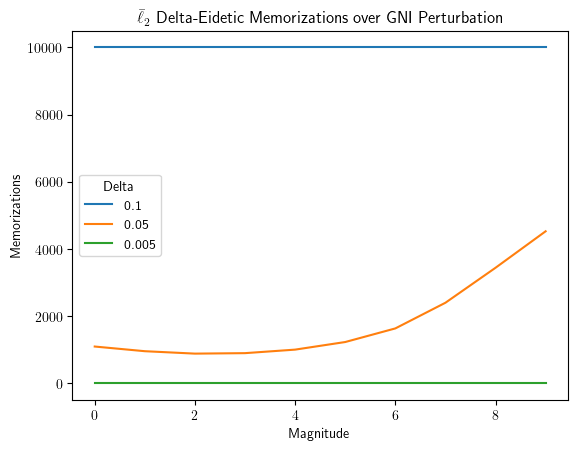

In [960]:
for i, delta in enumerate(deltas):
    plt.plot(l2s, l2_delta_mems[delta], label=delta)
plt.legend(title="Delta")
plt.title("$\\bar{\ell}_2$ Delta-Eidetic Memorizations over GNI Perturbation")
plt.xlabel("Magnitude")
plt.ylabel("Memorizations")
plt.show()

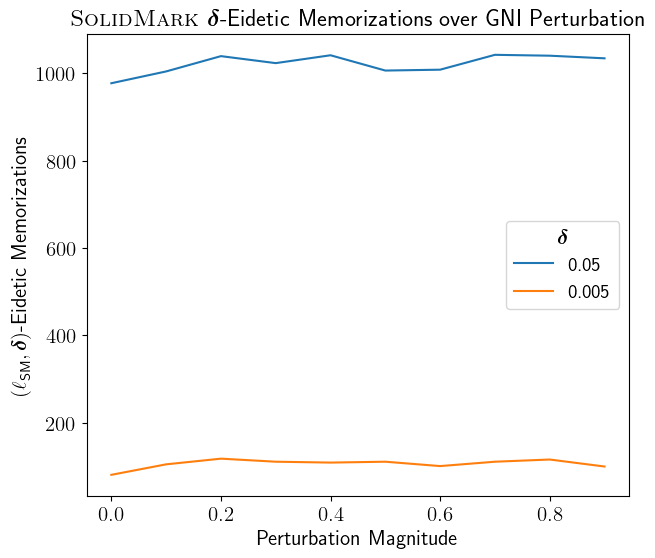

In [961]:
deltas = [0.05, 0.005]
plt.figure(figsize=(7, 6))
for i, delta in enumerate(deltas):
    plt.plot([border / 10 for border in borders], border_delta_mems[delta], label=delta)
leg=plt.legend(title=r"$\boldsymbol{\delta}$",fontsize=14)
plt.setp(leg.get_title(),fontsize='15')
plt.title(r"$\textsc{SolidMark}$ $\boldsymbol{\delta}$-Eidetic Memorizations over GNI Perturbation", fontsize=17)
plt.xlabel("Perturbation Magnitude", fontsize=15)
plt.ylabel(r"$(\ell_{\text{SM}}, \boldsymbol{\delta})$-Eidetic Memorizations", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

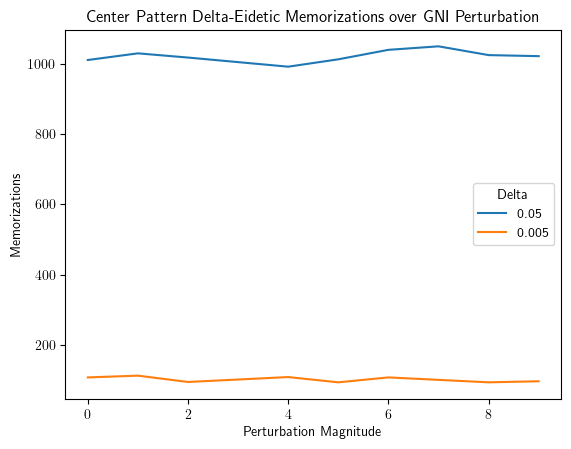

In [962]:
for i, delta in enumerate(deltas):
    plt.plot(centers, center_delta_mems[delta], label=delta)
plt.legend(title="Delta")
plt.title("Center Pattern Delta-Eidetic Memorizations over GNI Perturbation")
plt.xlabel("Perturbation Magnitude")
plt.ylabel("Memorizations")
plt.show()

In [986]:
distances_avg = [
    torch.load(f'./trained_models/distances_sd_dup_avg_{i}.pt', map_location='cpu') for i in range(1, 10)
]
distances_nearest = [
    torch.load(f'./trained_models/distances_sd_dup_nearest_{i}.pt', map_location='cpu') for i in range(1, 10)
]
mems = [
    torch.load(f'./trained_models/distances_sd_dup_mem_{i}.pt', map_location='cpu') for i in range(1, 10)
]

In [987]:
deltas = [0.1, 0.05, 0.005]
avgs_deltas = {
    delta : [
        torch.sum(v < delta) for v in distances_avg
    ] for delta in deltas
}
nrst_deltas = {
    delta : [
        torch.sum(v < delta) for v in distances_nearest
    ] for delta in deltas
}

In [990]:
mems_per_delta = {delta: [] for delta in deltas}
for delta in deltas:
    for i in range(len(mems)):
        mems_per_delta[delta].append([mems[i][j].item() if distances_nearest[i][j] < delta else -1 for j in range(mems[i].size(0))])

In [992]:
avgs_per_delta = {delta: [] for delta in deltas}
for delta in deltas:
    for i in range(len(mems)):
        avgs_per_delta[delta].append([0 if distances_avg[i][j] < delta else -1 for j in range(mems[i].size(0))])
avgs_per_delta = {
    k : [[lst[x:x+10] for x in range(0, len(lst), 10)] for lst in v] for k, v in avgs_per_delta.items()
}

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -1, -1, -1, 0, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, 0, -1, -1, 0, -1, 0], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, 0, 0, -1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, -1, 0, -1, 0, 0, -1, -1], [0, -1, -1, -1, -1, -1, -1, -1, -1, 0], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 0, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, -1, -1, -1, -1, -1, -1, 0, -1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, 0, -1, 0, -1, -1, -1, -1, -1], [0, 0, 0, -1, 0, 0, -1, -1, -1, -1], [0, -1, 0, 0, 0, -1, -1, 0, 0, 0], [-1, -1, -1, 0, 0, 0, -1, -1, 0, -1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, 0, 0, 0, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0],

In [993]:
mems_per_delta = {
    k : [[lst[x:x+10] for x in range(0, len(lst), 10)] for lst in v] for k, v in mems_per_delta.items()
}

In [994]:
def avg(iterable):
    return sum(iterable) / len(iterable)

In [995]:
conf_per_delta = {
    delta: [[sum(instance != -1 for instance in ten) for ten in dup] for dup in mems_per_delta[delta]] for delta in deltas
}
conf_per_delta = {
    delta: [avg([ten for ten in dup if ten != 0]) for dup in conf_per_delta[delta]] for delta in deltas
}
conf_per_delta

{0.1: [6.037037037037037,
  7.594594594594595,
  7.45945945945946,
  8.409090909090908,
  7.8,
  8.209302325581396,
  9.108695652173912,
  9.090909090909092,
  9.729166666666666],
 0.05: [3.7777777777777777,
  5.9,
  5.714285714285714,
  6.102564102564102,
  5.868421052631579,
  5.9411764705882355,
  7.068181818181818,
  6.682926829268292,
  7.808510638297872],
 0.005: [1.2,
  1.1538461538461537,
  1.8333333333333333,
  1.5,
  2.0,
  1.5333333333333334,
  1.8518518518518519,
  1.9523809523809523,
  2.107142857142857]}

In [996]:
uniques_per_delta = {
    k : [[len(set(keys)) - 1 for keys in dup] for dup in v] for k, v in mems_per_delta.items()
}

In [997]:
freqs_per_delta = {
    k : [dict(Counter(uniques)) for uniques in v] for k, v in uniques_per_delta.items()
}

In [999]:
found_per_delta = {
    delta: [sum([instance > 0 for instance in dup]) for dup in uniques_per_delta[delta]] for delta in deltas
}

In [1000]:
found_per_delta

{0.1: [25, 28, 28, 34, 39, 34, 38, 38, 41],
 0.05: [18, 30, 28, 36, 37, 32, 42, 41, 46],
 0.005: [5, 13, 12, 18, 16, 15, 27, 21, 28]}

In [1001]:
print({
    delta: [f * 2 for f in found_per_delta[delta]][:5] for delta in deltas
})

{0.1: [50, 56, 56, 68, 78], 0.05: [36, 60, 56, 72, 74], 0.005: [10, 26, 24, 36, 32]}


In [1002]:
found_avgs_per_delta = {
    delta: [sum([0 in instance for instance in dup]) for dup in avgs_per_delta[delta]] for delta in deltas
}

In [1003]:
found_avgs_per_delta

{0.1: [25, 33, 35, 31, 36, 34, 40, 36, 39],
 0.05: [17, 25, 28, 24, 31, 25, 31, 27, 31],
 0.005: [5, 9, 7, 3, 12, 11, 10, 11, 8]}

In [1015]:
distances_crop = [
    torch.load(f'./trained_models/distances_sd_crop_{i}_new.pt', map_location='cpu') for i in range(5)
]
rotation_angles = [350,355,357,358,359,1,2,3,5,10,15,180,270]
baseline=distances_crop[0]
distances_rotate = [baseline] + [
    torch.load(f'./trained_models/distances_sd_rotate_{i}_new.pt', map_location='cpu') for i in rotation_angles
]
distances_blur = [baseline] + [
    torch.load(f'./trained_models/distances_sd_blur_{i}_new.pt', map_location='cpu') for i in range(1, 5)
]

In [1016]:
deltas = [0.1, 0.05, 0.005]
deltas_crop = {
    delta: [torch.sum(dist < delta).item() for dist in distances_crop] for delta in deltas
}
deltas_rotate = {
    delta: [torch.sum(dist < delta).item() for dist in distances_rotate] for delta in deltas
}
deltas_blur = {
    delta: [torch.sum(dist < delta).item() for dist in distances_blur] for delta in deltas
}

In [1017]:
for delta in deltas:
    d = deltas_crop[delta]
    print(delta)
    print(deltas_crop[delta])
    print([f"{((a / d[0] - 1)) * 100:.2f}%" for a in d])

0.1
[1085, 1038, 1060, 1035, 1042]
['0.00%', '-4.33%', '-2.30%', '-4.61%', '-3.96%']
0.05
[557, 549, 541, 552, 528]
['0.00%', '-1.44%', '-2.87%', '-0.90%', '-5.21%']
0.005
[68, 58, 48, 49, 50]
['0.00%', '-14.71%', '-29.41%', '-27.94%', '-26.47%']


In [1018]:
for delta in deltas:
    print("DELTA:", delta)
    d = deltas_rotate[delta]
    reds = [f"{((a / d[0]) - 1) * 100:.2f}%" for a in d]
    angles = [0] + [r if r <= 270 else r - 360 for r in rotation_angles]
    for i in range(len(d)):
        print(f"\tRotation Angle {angles[i]} observed {d[i]} memorizations, a {reds[i]} reduction from baseline.")
        

DELTA: 0.1
	Rotation Angle 0 observed 1085 memorizations, a 0.00% reduction from baseline.
	Rotation Angle -10 observed 1057 memorizations, a -2.58% reduction from baseline.
	Rotation Angle -5 observed 1036 memorizations, a -4.52% reduction from baseline.
	Rotation Angle -3 observed 1049 memorizations, a -3.32% reduction from baseline.
	Rotation Angle -2 observed 1029 memorizations, a -5.16% reduction from baseline.
	Rotation Angle -1 observed 1053 memorizations, a -2.95% reduction from baseline.
	Rotation Angle 1 observed 1008 memorizations, a -7.10% reduction from baseline.
	Rotation Angle 2 observed 1047 memorizations, a -3.50% reduction from baseline.
	Rotation Angle 3 observed 1047 memorizations, a -3.50% reduction from baseline.
	Rotation Angle 5 observed 1071 memorizations, a -1.29% reduction from baseline.
	Rotation Angle 10 observed 1042 memorizations, a -3.96% reduction from baseline.
	Rotation Angle 15 observed 1031 memorizations, a -4.98% reduction from baseline.
	Rotation 

In [1008]:
for delta in deltas:
    d = deltas_blur[delta]
    print(delta)
    print(d)
    print([f"{((a / d[0]) - 1) * 100:.2f}%" for a in d])

0.1
[1085, 1049, 1064, 1089, 1033]
['0.00%', '-3.32%', '-1.94%', '0.37%', '-4.79%']
0.05
[557, 516, 503, 534, 506]
['0.00%', '-7.36%', '-9.69%', '-4.13%', '-9.16%']
0.005
[68, 42, 45, 53, 62]
['0.00%', '-38.24%', '-33.82%', '-22.06%', '-8.82%']


In [1009]:
baseline = torch.load("trained_models/distances_sd_RNA_0_new.pt", map_location='cpu')
RNA = torch.load("trained_models/distances_sd_RNA_4_new.pt", map_location='cpu')
RT = torch.load("trained_models/distances_sd_RWA_4_new.pt", map_location='cpu')
CWR = torch.load("trained_models/distances_sd_CWR_4_new.pt", map_location='cpu')
GNI = torch.load("trained_models/distances_sd_gaussian_1_new.pt", map_location='cpu')

In [1010]:
deltas = [0.1, 0.05, 0.005]
baseline_deltas = {
    delta: torch.sum(baseline < delta).item() for delta in deltas
}
RT_deltas = {
    delta: torch.sum(RT < delta).item() for delta in deltas
}
RT_change = {
    delta: f"{(RT_deltas[delta] * 100 / baseline_deltas[delta]) - 100:.2f}%" for delta in deltas
}
RNA_deltas = {
    delta: torch.sum(RNA < delta).item() for delta in deltas
}
RNA_change = {
    delta: f"{(RNA_deltas[delta] * 100 / baseline_deltas[delta]) - 100:.2f}%" for delta in deltas
}
CWR_deltas = {
    delta: torch.sum(CWR < delta).item() for delta in deltas
}
CWR_change = {
    delta: f"{(CWR_deltas[delta] * 100 / baseline_deltas[delta]) - 100:.2f}%" for delta in deltas
}
GNI_deltas = {
    delta: torch.sum(GNI < delta).item() for delta in deltas
}
GNI_change = {
    delta: f"{(GNI_deltas[delta] * 100 / baseline_deltas[delta]) - 100:.2f}%" for delta in deltas
}

In [1011]:
print("Baseline: ", baseline_deltas)
print("RT: ", RT_deltas)
print("RNA: ", RNA_deltas)
print("CWR: ", CWR_deltas)
print("GNI: ", GNI_deltas)
print("RT Change: ", RT_change)
print("RNA Change: ", RNA_change)
print("CWR Change: ", CWR_change)
print("GNI Change: ", GNI_change)

Baseline:  {0.1: 1066, 0.05: 549, 0.005: 55}
RT:  {0.1: 1072, 0.05: 539, 0.005: 58}
RNA:  {0.1: 1036, 0.05: 513, 0.005: 55}
CWR:  {0.1: 1074, 0.05: 533, 0.005: 56}
GNI:  {0.1: 1066, 0.05: 517, 0.005: 53}
RT Change:  {0.1: '0.56%', 0.05: '-1.82%', 0.005: '5.45%'}
RNA Change:  {0.1: '-2.81%', 0.05: '-6.56%', 0.005: '0.00%'}
CWR Change:  {0.1: '0.75%', 0.05: '-2.91%', 0.005: '1.82%'}
GNI Change:  {0.1: '0.00%', 0.05: '-5.83%', 0.005: '-3.64%'}


In [1022]:
celeba = torch.load('trained_models/distances_border_celeba_.pt', map_location='cpu')
deltas = [0.1, 0.05, 0.005]
celeba_deltas = {
    delta: torch.sum(celeba < delta) for delta in deltas
}

In [1023]:
celeba_deltas

{0.1: tensor(924), 0.05: tensor(466), 0.005: tensor(37)}

In [1025]:
pretrain_distances = torch.load('trained_models/distances_sd_pretrain_ckpt_562500.pt', map_location='cpu')

In [1028]:
deltas = [0.1, 0.05, 0.005]
pretrain_deltas = {
    delta: torch.sum(pretrain_distances < delta) for delta in deltas
}

In [1029]:
pretrain_deltas

{0.1: tensor(1988), 0.05: tensor(989), 0.005: tensor(105)}